In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos_completo = pd.read_csv('events.csv')

/home/soledad-escobar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
datos_completo.shape

(1011288, 23)

In [3]:
datos_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
eventos = datos_completo['event']
eventos.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

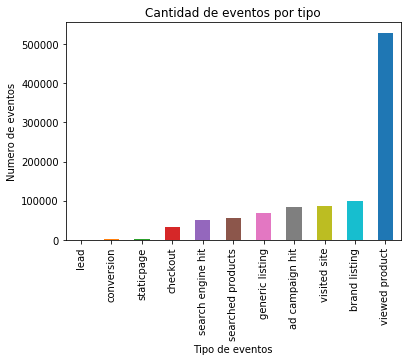

In [5]:
grupo_eventos=datos_completo.groupby(['event'])['event'].count().sort_values()
d=grupo_eventos.plot(kind='bar', title="Cantidad de eventos por tipo")
d.set_ylabel("Numero de eventos")
d.set_xlabel("Tipo de eventos")
d

In [6]:
#veamos de donde provienen los usuarios del sitio
df_con_region = datos_completo.loc[pd.notnull(datos_completo['region'])] #saco los que no tienen region
df_personas_con_region = df_con_region.drop_duplicates(subset='person') #saco todos los duplicados de cada usuario
paises_por_cada_usuario = df_personas_con_region['country']
paises_por_cada_usuario.value_counts().head()

Brazil           25768
Unknown            716
United States      297
Argentina           24
Canada              10
Name: country, dtype: int64

In [7]:
#analizamos las ciudades de Brasil donde estan la gran mayoria de los usuarios
df_usuarios_brasil = df_personas_con_region.loc[df_personas_con_region['country'] == 'Brazil']
ciudades_usuarios_brasil = df_usuarios_brasil['city']
cantidad_de_usuarios_brasil_por_ciudad = ciudades_usuarios_brasil.value_counts()[1:11] #Saco a Unknown
cantidad_de_usuarios_brasil_por_ciudad

São Paulo         3532
Rio de Janeiro    1153
Belo Horizonte     748
Salvador           746
Brasília           452
Fortaleza          375
Curitiba           370
Recife             307
Osasco             282
Porto Alegre       281
Name: city, dtype: int64

Text(0,0.5,'Cantidad de usuarios')

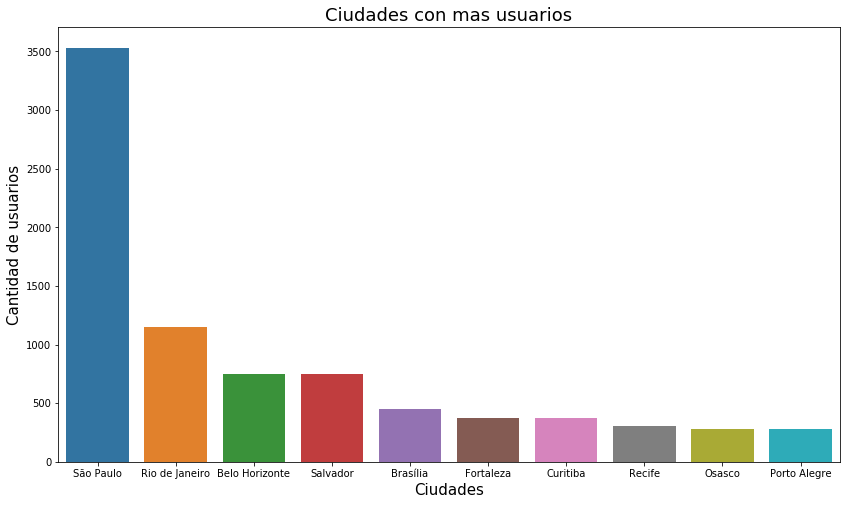

In [8]:
plt.subplots(figsize=(14,8))
bp = sns.barplot(x=cantidad_de_usuarios_brasil_por_ciudad.index, y= cantidad_de_usuarios_brasil_por_ciudad.values)
bp.set_title("Ciudades con mas usuarios", fontsize=18)
bp.set_xlabel("Ciudades", fontsize=15)
bp.set_ylabel("Cantidad de usuarios", fontsize=15)

**Analisis sobre la condición en que se encuentran los productos vendidos**

In [23]:
events = datos_completo.groupby('event')
conversiones = events.get_group('conversion')
conversiones['condition'].value_counts()

Bom                   538
Muito Bom             352
Excelente             258
Bom - Sem Touch ID     22
Novo                    2
Name: condition, dtype: int64

Bom                   538
Muito Bom             352
Excelente             258
Bom - Sem Touch ID     22
Novo                    2
Name: condition, dtype: int64

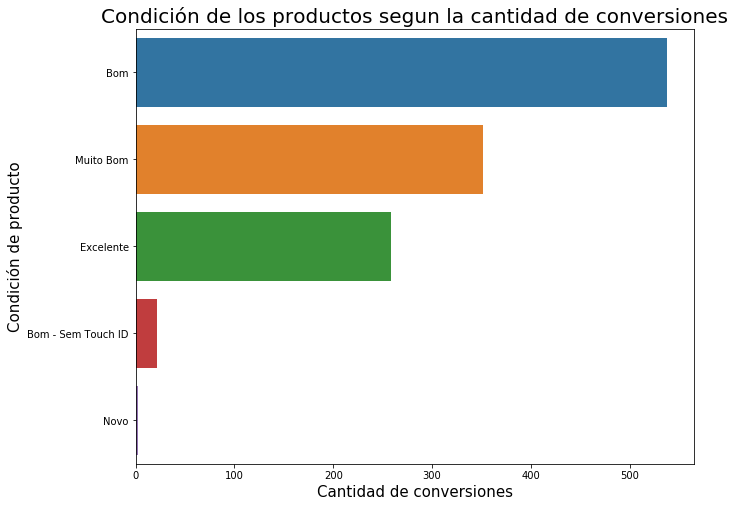

In [10]:
plt.subplots(figsize=(10,8))
condiciones = conversiones['condition'].value_counts()
graph = sns.barplot(x=condiciones.values, y= condiciones.index, orient = 'h')
graph.set_title("Condición de venta de los productos segun la cantidad de conversiones", fontsize=20)
graph.set_xlabel("Cantidad de conversiones", fontsize=15)
graph.set_ylabel("Condición de producto", fontsize=15)
condiciones.head()

# Análisis sobre motores de busqueda

Veo que puedo encontrar sobre los motores de busquedas que utilizan los usuarios. 

Analizo cual es el motor de búsqueda más popular, agurpando los datos por evento y tomo el evento search engine hit, que es el único que contiene datos sobre motores de búsquedas. Lo cual resulta lógico, pues es el evento en donde se realizan busquedas.


Google    50240
Bing        424
Yahoo       287
Ask           6
Name: search_engine, dtype: int64

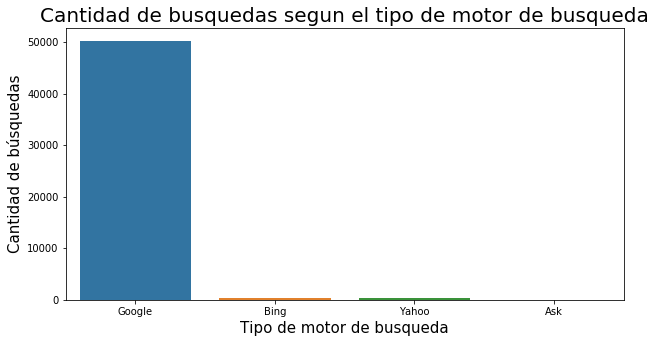

In [15]:
plt.subplots(figsize=(10,5))
searchEngineEvent = datos_completo.groupby('event').get_group('search engine hit')
canales_de_eventos = searchEngineEvent['search_engine'].value_counts()
g = sns.barplot(x=canales_de_eventos.index, y=canales_de_eventos.values, orient='v')
g.set_title("Cantidad de busquedas segun el tipo de motor de busqueda", fontsize=20)
g.set_xlabel("Tipo de motor de busqueda", fontsize=15)
g.set_ylabel("Cantidad de búsquedas", fontsize=15)
canales_de_eventos

Se observa, que como era de esperarse, la mayoria de las búsquedas se realizan a traves de Google.

# Análisis sobre usuarios 'new vs returning'

Quiero ver como se comportan los usuarios nuevos contra los usuarios que previamente habían visitado el sitio.

In [16]:
newVsReturning = datos_completo.groupby('new_vs_returning')
newVsReturning.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0
16,2018-05-24 11:21:07,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,Returning,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0


Veo que cosas interesantes puedo encontrar sobre los usuarios new contra los returning según el tipo de canal desde el cuál acceden al sitio. 

Para esto hago un conteo para ver la cantidad de usuarios new y returning que tienen actividad según el canal de acceso.



In [17]:
newVsReturningChannel = datos_completo.groupby(['new_vs_returning', 'channel']).count().reset_index()
newVsReturningChannel

,new_vs_returning,channel,timestamp,event,person,url,sku,model,condition,storage,...,staticpage,campaign_source,search_engine,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,New,Direct,2207,2207,2207,0,0,0,0,0,...,0,0,0,2207,2207,2207,2207,2207,2207,2207
1,New,Email,10,10,10,0,0,0,0,0,...,0,0,0,10,10,10,10,10,10,10
2,New,Organic,5709,5709,5709,0,0,0,0,0,...,0,0,0,5709,5709,5709,5709,5709,5709,5709
3,New,Paid,17809,17809,17809,0,0,0,0,0,...,0,0,0,17809,17809,17809,17809,17809,17809,17809
4,New,Referral,684,684,684,0,0,0,0,0,...,0,0,0,684,684,684,684,684,684,684
5,New,Social,478,478,478,0,0,0,0,0,...,0,0,0,478,478,478,478,478,478,478
6,New,Unknown,1,1,1,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
7,Returning,Direct,16315,16315,16315,0,0,0,0,0,...,0,0,0,16315,16315,16315,16315,16315,16315,16315
8,Returning,Email,66,66,66,0,0,0,0,0,...,0,0,0,66,66,66,66,66,66,66
9,Returning,Organic,6639,6639,6639,0,0,0,0,0,...,0,0,0,6639,6639,6639,6639,6639,6639,6639


Represento los datos en un **Heatmap** creando una **Tabla Pivot** con la cantidad de usuarios new contra returning que visitan la página separandolos por tipo de canal.

In [18]:
conteoNewVsRetChannel = newVsReturningChannel.pivot_table(index = 'new_vs_returning', columns = 'channel', values = 'person')
conteoNewVsRetChannel

channel,Direct,Email,Organic,Paid,Referral,Social,Unknown
new_vs_returning,,,,,,,
New,2207,10,5709,17809,684,478,1
Returning,16315,66,6639,26384,10700,368,8


Text(33,0.5,'Canal')

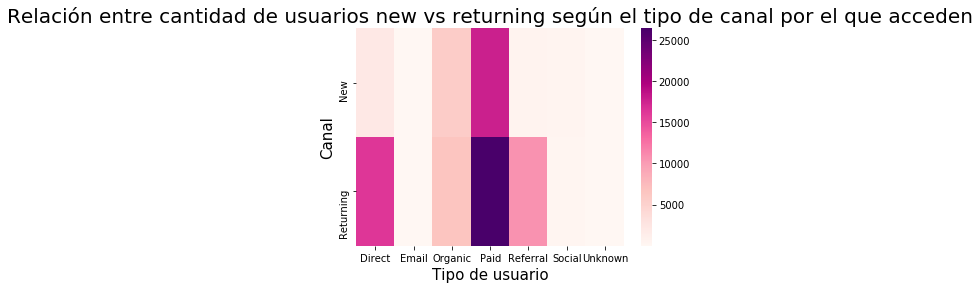

In [19]:
g = sns.heatmap(conteoNewVsRetChannel, cmap="RdPu", )
g.set_title("Relación entre cantidad de usuarios new vs returning según el tipo de canal por el que acceden", fontsize=20)
g.set_xlabel("Tipo de usuario",fontsize=15)
g.set_ylabel("Canal", fontsize=15)

Se puede observar que la mayoria de los usuarios que ya se habían registrado antes, visitan el sitio a través de un canal pago. Con los nuevos usuarios se observan que acceden en casi en la misma medida desde un canal directo o un canal pago.

Entendiendo que un canal 'Paid' es un canal de publicidad pago, puede notarse la efectividad del mismo, contra los otros canales utilizados, para atraer a los usuarios a volver a visitar el sitio web.